<a href="https://colab.research.google.com/github/tjrgh822/class_itsystem/blob/master/hw2/hw2_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x

In [0]:
import tensorflow as tf

tf.__version__

In [0]:
import numpy as np
import numpy.random as rd
import sys
import matplotlib.pyplot as plt
import time

rd.seed(7777)

dataset_num = 8000
variance = 0.4
wtflag = 0
file_exist = False


'''dataset_num = 100
variance = 0.5
wtflag = 0
learning_rate = 0.2
file_exist = False

epochs = 500  -> 75%
[[3, 'True', 'relu'],[50, 'True', 'relu'], [50, 'True', 'relu'], [2, 'False', 'sigmoid']]


dataset_num = 80
variance = 0.5
wtflag = 0
learning_rate = 0.5
file_exist = False

epochs = 1200
test = NN(t_x_data, t_y_data, test_x_data, test_y_data, [[2, 'True', 'relu'],[30, 'True', 'relu'],[30, 'True', 'relu'], [30, 'True', 'relu'], [1, 'False', 'sigmoid']], learning_rate=learning_rate)
'''


# making dataset
def making_data_set(d_num):
    d_set = np.empty(1)
    if file_exist:
        tmp = np.load(sys.argv[1])
        d_set = np.append(d_set, tmp)
    else:
        for i in range(int(d_num)):
            b0 = int(rd.randint(0, 2, 1))
            b1 = int(rd.randint(0, 2, 1))
            b2 = int(rd.randint(0, 2, 1))
            
            x = rd.normal(b0*2 - 1, variance)
            y = rd.normal(b1*2 -1, variance)
            z = rd.normal(b2*2-1, variance)
            
            result = b0 + b1 + b2
            
            rb0 = result % 2
            rb1 = int(result/2) % 2
            d_set = np.append(d_set, [[x, y, z, rb0, rb1]])
            '''x = rd.randint(0, 2, 1)
            y = rd.randint(0, 2, 1)
            rst = x | y
            
            d_set = np.append(d_set, [x, y, rst])'''
    d_set = np.delete(d_set, 0, axis=0)
    d_set = d_set.reshape(-1, 5)
    #d_set = d_set.reshape(-1, 3)
    return d_set
t_data = making_data_set(dataset_num)
t_x_data = t_data[:, 0:-2]
t_y_data = t_data[:, -2:].reshape(-1, 2)

test_data = making_data_set(100)
test_x_data = test_data[:, 0:-2]
test_y_data = test_data[:, -2:].reshape(-1, 2)

'''t_data = making_data_set()
t_x_data = t_data[:, 0:-1]
t_y_data = t_data[:, -1].reshape(-1, 1)

test_data = making_data_set()
test_x_data = t_data[:, 0:-1]
test_y_data = t_data[:, -1].reshape(-1, 1)'''


print(f"x test data : \n{test_x_data.shape}\n y test data : \n {test_y_data.shape}\n")

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class layer_class:
    def sigmoid(self, a):
        return 1/(1 + np.exp(-a)) 
    def relu(self, b):
        return np.where(b < 0, 0, b)
    def dsigmoid(self, a):
        return a * (1 - a)
    def drelu(self, a):
        return np.where( a<0, 0, 1)
    w = np.array([]); bias = 'False'; ftn = sigmoid; dftn = dsigmoid; b = np.array([]);  dataflow = np.array([]);  delta = np.array([])
    def __init__(self, w, bias='False', activation = 'sigmoid'):
        self.w = w
        if bias == 'True':
            self.bias = 'True'
            self.b = np.zeros((1, w.shape[1]))
        else:
            self.bias = 'False'
        if activation == 'sigmoid':
            self.ftn = self.sigmoid
            self.dftn = self.dsigmoid
        elif activation == 'relu':
            self.ftn = self.relu
            self.dftn = self.drelu

x test data : 
(100, 3)
 y test data : 
 (100, 2)



In [0]:

class NN:
    train_set_x, train_set_y, test_set_x, test_set_y, learning_rate, end_learning_rate, activate = np.array([]), np.array([]), np.array(
        []), np.array([]), 0, 0, 'sigmoid'
    layer, train_loss, test_loss, train_accuracy, test_accuracy = [], [], [], [], []
    feature = []
    batch = 1
    # 추적
    weight_hist = []
    delta_hist = []
    bias_hist = []

    def __init__(self, train_set_x, train_set_y, test_set_x, test_set_y, feature, learning_rate=0.01,\
                end_learning_rate = 0.01, activate='sigmoid', batch=1):
        self.learning_rate = learning_rate
        self.end_learning_rate = end_learning_rate
        self.activate = activate
        self.train_set_x = train_set_x
        self.train_set_y = train_set_y
        self.test_set_x = test_set_x
        self.test_set_y = test_set_y
        self.feature = feature
        self.batch = batch
        self.layer, self.train_loss, self.test_loss, self.train_accuracy, self.test_accuracy = [], [], [], [], []
        self.weight_hist = []
        self.delta_hist = []
        self.bias_hist = []
        # w initialization sigmoid use xavier initialization  Relu using He initialization
        for i, f in enumerate(self.feature):
            if i == (len(self.feature) - 1):
                break
            w = 0
            if f[2] is 'sigmoid':
                w = rd.randn(f[0], int(self.feature[i + 1][0])) * np.sqrt(1 / (f[0]))
            elif f[2] is 'relu':
                w = rd.randn(f[0], int(self.feature[i + 1][0])) * np.sqrt(2 / (f[0] + self.feature[i + 1][0]))
            self.layer.append(layer_class(w, f[1], f[2]))

    # forwarding
    def pri(self):
        '''for i in self.layer:
            print(i.w)'''
        print("data predict : \n", self.layer[-1].dataflow)

    def forwarding(self, x_data, y_data):
        for i, k in enumerate(self.layer):
            a = np.array([])
            # 첫단에만 input
            a = np.append(a, np.dot(x_data, k.w)).reshape(x_data.shape[0], k.w.shape[1]) if i == 0 \
                        else np.append(a, np.dot(self.layer[i - 1].dataflow, k.w)).reshape(x_data.shape[0], k.w.shape[1])
            #bias 추가
            if k.bias == 'True':
                a = np.multiply(np.ones((int(x_data.shape[0]), int(k.w.shape[1]))), k.b) + a
            k.dataflow = k.ftn(a)


    def backpropagation(self, x_data, y_data, lr):
        for i, L in reversed(list(enumerate(self.layer))):
            #delta구하기, 마지막 단만 cross entropy derivation 값
            L.before_w = L.w
            L.delta = y_data - L.dataflow if i is (len(self.layer) - 1) \
                                        else np.multiply(L.dftn(L.dataflow), \
                                        np.dot(self.layer[i + 1].delta, self.layer[i + 1].before_w.T))

            # i가 0 이면 input data가 train_set
            inputt = x_data if i ==0 else self.layer[i - 1].dataflow
            
            '''x_k * delta -> upgrade할 weight'''
            upgrade_w = np.array([np.outer(inputt[k], L.delta[k]) for k in range(L.delta.shape[0])])\
                        .reshape(-1, L.w.shape[0], L.w.shape[1])
            
            """update bias"""
            if L.bias == 'True':
                L.b = L.b + L.delta * self.learning_rate
            """update weight"""
            L.w = L.w + np.average(upgrade_w, axis=0) * self.learning_rate

    def training(self, epochs):
        for i in range(epochs):
            for j in range(self.batch):
                x_data = self.train_set_x[
                        int(len(self.train_set_x) / self.batch) * j: int(len(self.train_set_x) / self.batch) * (j + 1),
                        :]
                y_data = self.train_set_y[
                        int(len(self.train_set_y) / self.batch) * j: int(len(self.train_set_y) / self.batch) * (j + 1),
                        :]
                lr = self.learning_rate + (self.end_learning_rate - self.learning_rate) / epochs
                self.forwarding(x_data, y_data)
                self.backpropagation(x_data, y_data, lr)
            self.data_save(self.test_set_x, self.test_set_y)

            # print(f"bias : {self.layer[0].b}")
            if i % 100 == 0:
                print(f"epochs : {i}\t train_loss :{self.train_loss[i]:.4}\t test_loss :{self.test_loss[i]:.4}\t train_accuracy :{self.train_accuracy[i]:.3}%\t test_accuracy :{self.test_accuracy[i]:.3}%")

    def plot(self):

        plt.figure()
        plt.plot(self.train_loss, 'b')
        plt.plot(self.test_loss, 'r')
        plt.show()

        plt.figure()
        plt.plot(self.train_accuracy, 'b')
        plt.plot(self.test_accuracy, 'r')
        plt.show()

        ''' plt.figure()
        plt.plot(self.weight_hist)
        plt.plot(self.delta_hist)
        plt.show()'''

        plt.figure()
        plt.plot(self.bias_hist)
        plt.show()

    def data_save(self, x_data, y_data):
        #train loss, accuracy 구하기
        predict = self.layer[-1].dataflow
        y = self.train_set_y[-int(len(self.train_set_y) / self.batch):, :]
        train_loss = np.average( -(y*np.log(predict + 1e-7) + (1-y)*np.log(1-predict+ 1e-7) ))
        self.train_loss.append(train_loss)
        
        train_result = np.equal(y, np.array([self.layer[-1].dataflow > result_mean]))
        train_correct = np.average(train_result) * 100
        self.train_accuracy.append(train_correct)
        
        for i, k in enumerate(self.layer):
            a = np.array([])
            if i is 0:
                a = np.append(a, np.dot(x_data, k.w))
            else:
                a = np.append(a, np.dot(self.layer[i - 1].dataflow, k.w))

            a = a.reshape(self.test_set_x.shape[0], k.w.shape[1])
            # print(a.shape)
            k.dataflow = k.ftn(a)
            
            if i == 0:
                self.weight_hist.append(k.w.reshape(-1))
                self.delta_hist.append(k.delta.reshape(-1))
                if k.bias is "True":
                    self.bias_hist.append(k.b.reshape(-1))
                    
        self.test_loss = np.append(self.test_loss, np.average((self.layer[-1].dataflow - y_data)**2))

        # print(self.layer[-1].dataflow)
        # result = np.array([self.layer[-1].dataflow > 0.5])
        result = np.array([self.layer[-1].dataflow > result_mean])
        cnt = np.equal(self.test_set_y, result)
        # print(f"ny_data : \n{self.test_set_y}\n\n y^ : \n{self.layer[-1].dataflow}")
        correct = np.average(cnt) * 100
        self.test_accuracy.append(correct)


==================== S : f0====================
epochs : 0	 train_loss :0.6933	 test_loss :0.248	 train_accuracy :52.4%	 test_accuracy :56.5%
epochs : 100	 train_loss :0.299	 test_loss :0.1469	 train_accuracy :84.7%	 test_accuracy :79.0%
epochs : 200	 train_loss :0.1374	 test_loss :0.09007	 train_accuracy :97.6%	 test_accuracy :89.5%
epochs : 300	 train_loss :0.03899	 test_loss :0.0619	 train_accuracy :99.8%	 test_accuracy :93.0%
==================== S : f1====================
epochs : 0	 train_loss :0.7025	 test_loss :0.2465	 train_accuracy :50.2%	 test_accuracy :53.5%
epochs : 100	 train_loss :0.07727	 test_loss :0.06321	 train_accuracy :99.3%	 test_accuracy :92.5%
epochs : 200	 train_loss :0.011	 test_loss :0.04547	 train_accuracy :1e+02%	 test_accuracy :95.0%
epochs : 300	 train_loss :0.004882	 test_loss :0.04234	 train_accuracy :1e+02%	 test_accuracy :95.0%
==================== S : f2====================
epochs : 0	 train_loss :0.7206	 test_loss :0.2479	 train_accuracy :50.6%	 tes

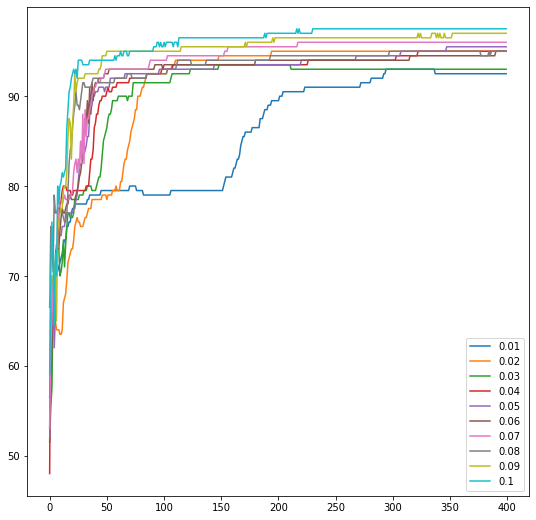

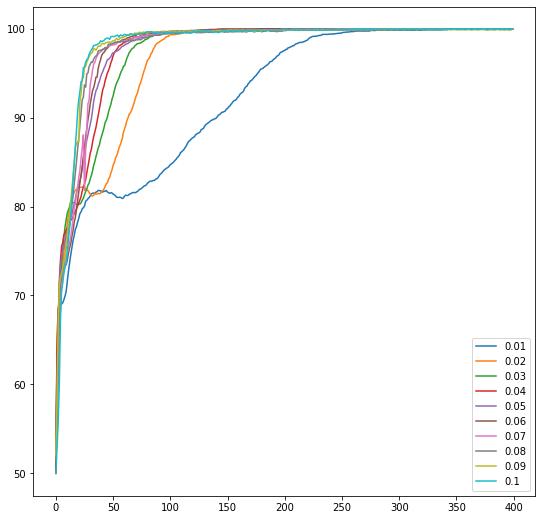

In [0]:
nn_list = []

for s in range(10):
  epochs = 400
  batch = 5
  learning_rate = 0.2 + s*0.2
  end_learning_rate = 0.2 + s*0.2
  result_mean = 0.5

  nn_list.append(NN(t_x_data, t_y_data, test_x_data, test_y_data, \
            [[3, 'True', 'sigmoid'], [40, 'True', 'sigmoid'],[40, 'True', 'sigmoid'], [2, 'False', 'sigmoid']], \
            learning_rate=learning_rate, batch=5))
  
  print(f'==================== S : f{s}====================')
  nn_list[s].training(epochs)

plt.figure(figsize = (9, 9))
for i in range(len(nn_list)):
    plt.plot(nn_list[i].test_accuracy,label = f'{0.01*(i+1):.4}')
plt.legend(loc = 'lower right')
plt.show()

plt.figure(figsize = (9, 9))
for i in range(len(nn_list)):
    plt.plot(nn_list[i].train_accuracy,label = f'{0.01*(i+1):.4}')
plt.legend(loc = 'lower right')
plt.show()

In [0]:

nn_list_node = []

for s in range(10):
    epochs = 400
    batch = 5
    learning_rate = 2.7
    end_learning_rate = 2.7
    result_mean = 0.5

    nn_list_node.append(NN(t_x_data, t_y_data, test_x_data, test_y_data, \
            [[3, 'True', 'sigmoid'], [10+s*5, 'True', 'sigmoid'],[10+s*5, 'True', 'sigmoid'],\
            [2, 'False', 'sigmoid']], \
            learning_rate=learning_rate, batch=batch))
    print(f"===================  S : {s} ====================")
    nn_list_node[s].training(epochs)


===================  S : 0 ====================
epochs : 0	 train_loss :0.9285	 test_loss :0.232	 train_accuracy :50.2%	 test_accuracy :59.0%
epochs : 100	 train_loss :0.01938	 test_loss :0.2007	 train_accuracy :99.3%	 test_accuracy :79.0%
epochs : 200	 train_loss :0.01056	 test_loss :0.202	 train_accuracy :99.5%	 test_accuracy :79.5%
epochs : 300	 train_loss :0.008345	 test_loss :0.2023	 train_accuracy :99.6%	 test_accuracy :79.5%
===================  S : 1 ====================
epochs : 0	 train_loss :0.979	 test_loss :0.2466	 train_accuracy :50.4%	 test_accuracy :50.0%
epochs : 100	 train_loss :0.01726	 test_loss :0.03675	 train_accuracy :99.0%	 test_accuracy :95.5%
epochs : 200	 train_loss :0.007186	 test_loss :0.03365	 train_accuracy :99.7%	 test_accuracy :96.5%
epochs : 300	 train_loss :0.005799	 test_loss :0.03252	 train_accuracy :99.7%	 test_accuracy :96.5%
===================  S : 2 ====================
epochs : 0	 train_loss :1.069	 test_loss :0.2378	 train_accuracy :51.7%	 te

ValueError: ignored

<Figure size 648x648 with 0 Axes>

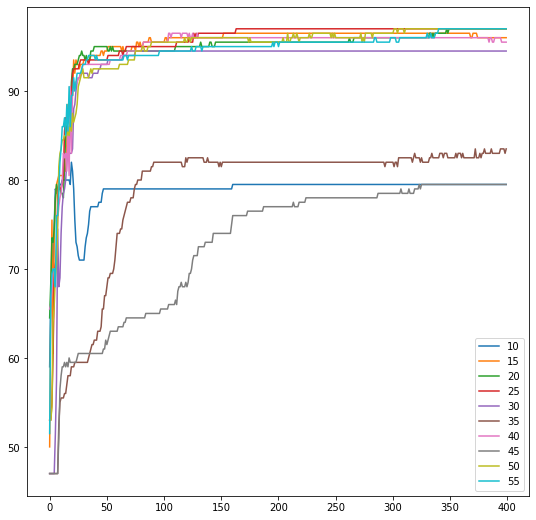

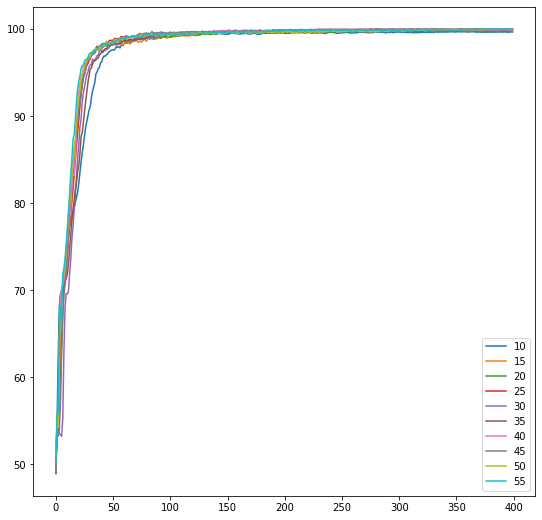

In [0]:

plt.figure(figsize = (9, 9))
for i in range(len(nn_list_node)):
    plt.plot(nn_list_node[i].test_accuracy,label = f'{10+i*5}')
plt.legend(loc = 'lower right')
plt.show()

plt.figure(figsize = (9, 9))
for i in range(len(nn_list_node)):
    plt.plot(nn_list_node[i].train_accuracy,label = f'{10+i*5}')
plt.legend(loc = 'lower right')
plt.show()


===================  S : 0 ====================
epochs : 0	 train_loss :1.024	 test_loss :0.2351	 train_accuracy :50.7%	 test_accuracy :54.0%
epochs : 100	 train_loss :0.002183	 test_loss :0.0007315	 train_accuracy :1e+02%	 test_accuracy :1e+02%
epochs : 200	 train_loss :0.0008788	 test_loss :0.0001754	 train_accuracy :1e+02%	 test_accuracy :1e+02%
epochs : 300	 train_loss :0.0005323	 test_loss :7.771e-05	 train_accuracy :1e+02%	 test_accuracy :1e+02%
===================  S : 1 ====================
epochs : 0	 train_loss :1.025	 test_loss :0.2351	 train_accuracy :50.6%	 test_accuracy :55.5%
epochs : 100	 train_loss :0.004902	 test_loss :0.002682	 train_accuracy :99.9%	 test_accuracy :1e+02%
epochs : 200	 train_loss :0.003771	 test_loss :0.001139	 train_accuracy :99.9%	 test_accuracy :1e+02%
epochs : 300	 train_loss :0.002109	 test_loss :0.0006978	 train_accuracy :99.9%	 test_accuracy :1e+02%
===================  S : 2 ====================
epochs : 0	 train_loss :1.026	 test_loss :0.235

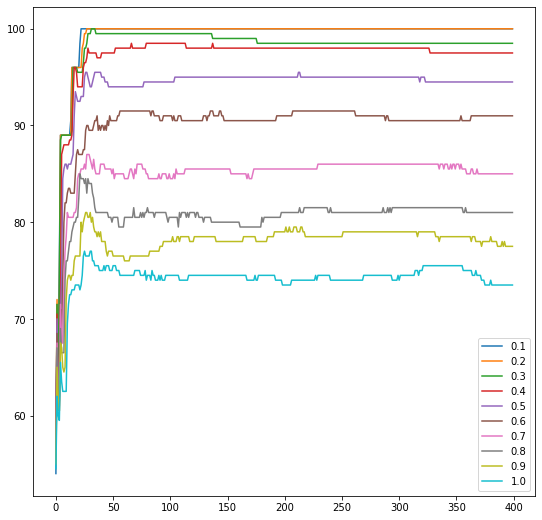

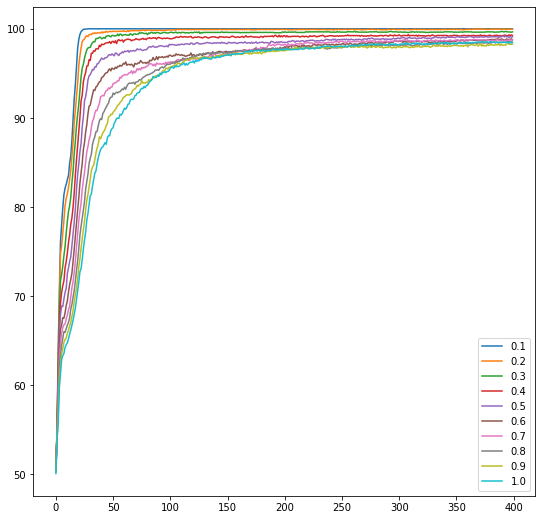

In [0]:
bnn_list_variance = []
for s in range(10):
  rd.seed(777)

  dataset_num = 8000
  variance = 0.1 + s*0.1
  wtflag = 0
  file_exist = False

  t_data = making_data_set(dataset_num).astype(np.float32)
  t_x_data = t_data[:, 0:-2]
  t_y_data = t_data[:, -2:].reshape(-1, 2)

  test_data = making_data_set(100).astype(np.float32)
  test_x_data = test_data[:, 0:-2]
  test_y_data = test_data[:, -2:].reshape(-1, 2)

  epochs = 400
  batch = 5
  learning_rate = 2.7
  end_learning_rate = 2.7
  result_mean = 0.5

  nn_list_variance.append(NN(t_x_data, t_y_data, test_x_data, test_y_data, \
          [[3, 'True', 'sigmoid'], [15, 'True', 'sigmoid'],[15, 'True', 'sigmoid'],\
            [2, 'False', 'sigmoid']], \
          learning_rate=learning_rate, batch=batch))
  print(f"===================  S : {s} ====================")
  nn_list_variance[s].training(epochs)

plt.figure(figsize = (9, 9))
for i in range(len(nn_list_variance)):
    plt.plot(nn_list_variance[i].test_accuracy,label = f'{0.1+i*0.1:.4}')
plt.legend(loc = 'lower right')
plt.show()

plt.figure(figsize = (9, 9))
for i in range(len(nn_list_variance)):
    plt.plot(nn_list_variance[i].train_accuracy,label = f'{0.1*(i+1):.4}')
plt.legend(loc = 'lower right')
plt.show()



In [4]:
import numpy as np

for i in range(10):
  a = np.random.randn(10000) *0.1 * i + 1

  truth = np.where(a<0, True, False)
  print(f"i : {i} , value : {np.average(truth)*100}%")



i : 0 , value : 0.0%
i : 1 , value : 0.0%
i : 2 , value : 0.0%
i : 3 , value : 0.05%
i : 4 , value : 0.47000000000000003%
i : 5 , value : 2.29%
i : 6 , value : 4.8500000000000005%
i : 7 , value : 7.93%
i : 8 , value : 10.38%
i : 9 , value : 13.100000000000001%
